## Интеллектуальный анализ данных – весна 2025
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

* Если в задании есть вопрос на рассуждение, то за отсутствие ответа на него балл за задание будет снижен вполовину.

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать с усеченным датасетом `Palmer Penguins`, содержащим информацию о характеристиках трех видов пингвинов: `Adelie`, `Chinstrap` и `Gentoo`:



*   Species — вид пингвина (целевая переменная).
*   Island — остров, на котором была сделана запись.
*   Clutch Completion — завершенность кладки яиц.
*   Date Egg — закодированная дата откладки яиц (число дней от самой ранней даты в данных).
*   Culmen Length (mm) — длина клюва.
*   Culmen Depth (mm) — глубина клюва.
*   Flipper Length (mm) — длина ласт.
*   Body Mass (g) — масса тела в граммах.
*   Sex — пол особи.
*   Delta 15 N (o/oo) и Delta 13 C (o/oo) — изотопные значения, характеризующие пищевые предпочтения.

Описание полного набора данных и дополнительную информацию о проекте можно найти [здесь](https://allisonhorst.github.io/palmerpenguins/index.html) и [здесь](https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data?resource=download).

![Palmer Penguins](https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png)



In [519]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [520]:
data_row = pd.read_csv('penguins_data.csv')
data_row.head(10)

,Species,Island,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,Chinstrap,Dream,Yes,382,50.9,19.1,196.0,3550.0,MALE,10.02372,-24.86594
1,Chinstrap,Dream,Yes,741,45.2,17.8,198.0,3950.0,FEMALE,8.88942,-24.49433
2,Gentoo,Biscoe,Yes,744,46.5,13.5,210.0,4550.0,FEMALE,7.99530,-25.32829
3,Chinstrap,Dream,Yes,10,45.2,16.6,191.0,3250.0,FEMALE,9.62357,-24.78984
4,Gentoo,Biscoe,Yes,13,48.4,14.4,203.0,4625.0,FEMALE,8.16582,-26.13971
5,Gentoo,Biscoe,Yes,22,48.1,15.1,209.0,5500.0,MALE,8.45738,-26.22664
6,Gentoo,Biscoe,Yes,13,51.1,16.5,225.0,5250.0,MALE,8.20660,-26.36863
7,Gentoo,Biscoe,No,392,42.7,13.7,208.0,3950.0,FEMALE,8.14567,-26.59467
8,Adelie,Biscoe,Yes,14,39.6,20.7,191.0,3900.0,FEMALE,8.80967,-26.78958
9,Gentoo,Biscoe,Yes,735,46.1,13.2,211.0,4500.0,FEMALE,7.99300,-25.51390


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные признаки? Если да, то закодируйте их самым оптимальным способом. Аргументируйте свой выбор.

In [521]:
data_row.isna().any().any()

True

<b>Пропуски есть, удалим их</b>

In [522]:
data = data_row.dropna()

В датасете есть 4 категориальных переменных: вид пингвина (Species), остров, на котором была сделана запись (Island), завершенность кладки яиц (Clutch Completion), пол особи (Sex). Для начала проверим, какие значения может принимать каждый из признаков. 

In [523]:
data['Species'].unique(), data['Island'].unique(), data['Clutch Completion'].unique(), data['Sex'].unique()

(array(['Chinstrap', 'Gentoo', 'Adelie'], dtype=object),
 array(['Dream', 'Biscoe', 'Torgersen'], dtype=object),
 array(['Yes', 'No'], dtype=object),
 array(['MALE', 'FEMALE', '.'], dtype=object))

In [524]:
data[data['Sex'] == '.']

,Species,Island,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
41,Gentoo,Biscoe,Yes,0,44.5,15.7,217.0,4875.0,.,8.04111,-26.18444


В данных есть одна строчка, где признак 'Sex' равен '.'. Поскольку такой случай только один, можно посчитать его за пропуск и удалить из данных.

In [525]:
data = data.drop(data[data['Sex'] == '.'].index) # удаление строки 

In [526]:
data['Species'].unique(), data['Island'].unique(), data['Clutch Completion'].unique(), data['Sex'].unique() 
# проверяем каждую из категориальных переменных на уникальные значения

(array(['Chinstrap', 'Gentoo', 'Adelie'], dtype=object),
 array(['Dream', 'Biscoe', 'Torgersen'], dtype=object),
 array(['Yes', 'No'], dtype=object),
 array(['MALE', 'FEMALE'], dtype=object))

Теперь мы готовы кодировать признаки:
1) Species: 3 уникальных значения. Так как это целевая переменная, ее закодируем в следующем пункте задания в ординальном порядке. Хотя признак и не имеет упорядоченности, мы не можем его закодировать через OneHotEncoding, так как это целевая переменная и будет тяжело потом решать задачу классификации 
2) Island: 3 уникальных значения. Признак не порядковый (мы не можем сказать, что один остров лучше или "больше" другого). Воспользуемся OneHotEncoding
3) Clutch Completion: бинарный признак, принимает значения 'Yes' и 'No'. Можем считать, что здесь есть порядок (Yes > No), поэтому закодируем так: 'Yes' - 1, 'No' - 0
4) Sex: 2 уникальных значения. Признак не порядковый, воспользуемся OneHotEncoding. 

In [527]:
# кодирование Island и Sex через OneHotEncoding, 
# первую колонку удаляем, так как ее значения автоматически определяются из остальных
data = pd.get_dummies(data, columns= ['Island', 'Sex'], drop_first=True)

# кодирование Clutch Completion
data['Clutch Completion'] = data['Clutch Completion'].apply(lambda x: 1 if x=='Yes' else 0)

Целевую категориальную переменную закодируйте в ординальном порядке: Chinstrap = 0, Gentoo = 1, Adelie = 2. Можно воспользоваться [OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html).

Теперь сохраним информацию о признаках в переменную
`X`, а о целевой переменной – в переменную `y`.

In [528]:
# Кодирование целевой переменной
from sklearn.preprocessing import OrdinalEncoder
species = ['Chinstrap', 'Gentoo', 'Adelie']
enc = OrdinalEncoder(categories=[species])
data['Species'] = enc.fit_transform(data[['Species']])

In [529]:
X = data.drop('Species', axis=1)
y = data['Species']

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

Используйте аргумент `stratify` при разбиении. Почему это важно?

In [530]:
from sklearn.model_selection import train_test_split
np.random.seed(13)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13, stratify=y) 

<b>Использование stratify важно для сохранения пропорций значений целевой переменной в тренировочной и тестовой выборках. </b>

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака:  `Flipper Length (mm)` и `Body Mass (g)`  – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [531]:
# Масштабируем признаки при помощи модуля StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = pd.DataFrame(data=scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(data=scaler.fit_transform(X_test), columns=X_test.columns)

In [532]:
# Выделим нужные нам признаки
X_train_13 = X_train[['Flipper Length (mm)', 'Body Mass (g)']]
X_test_13 = X_test[['Flipper Length (mm)', 'Body Mass (g)']]

In [533]:
res = {'NN': [1, 3, 5, 10, 15, 25], 'Train': [], 'Test': []}
models = []
from sklearn.neighbors import KNeighborsClassifier
for i in [1, 3, 5, 10, 15, 25]:
    clf = KNeighborsClassifier(n_neighbors=i, p=2, n_jobs=4)
    clf.fit(X_train_13, y_train)
    models.append(clf)
    res['Train'].append(np.round(np.mean(y_train == clf.predict(X_train_13)), 3))
    res['Test'].append(np.round(np.mean(y_test == clf.predict(X_test_13)), 3))

In [534]:
pd.DataFrame(res).set_index('NN')

,Train,Test
NN,,
1,0.965,0.776
3,0.876,0.776
5,0.827,0.837
10,0.810,0.867
15,0.805,0.867
25,0.792,0.837


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/).

In [99]:
conda install mlxtend

Retrieving notices: ...working... done
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\User\anaconda3

  added / updated specs:
    - mlxtend


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    mlxtend-0.23.4             |  py311haa95532_0         1.4 MB
    openssl-3.0.16             |       h3f729d1_0         7.8 MB
    scikit-learn-1.6.1         |  py311h585ebfc_0         9.7 MB
    threadpoolctl-3.5.0        |  py311h746a85d_0          50 KB
    vc-14.42                   |       haa95532_4          11 KB
    vs2015_runtime-14.42.34433 |       he0abc0d_4         1.2 MB
    ------------------------------------------------------------
                                           Total:        20.2 MB

The following NEW packages will be INSTALLED:

  mlxtend            pkgs/main/win-64::mlxtend-0.23.4-py311haa95532_0 

The following packages wil



==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 25.1.1

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=25.1.1




Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [486]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов.
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново.
6. Построение графика может занять некоторое время – придётся немного подождать!

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fit

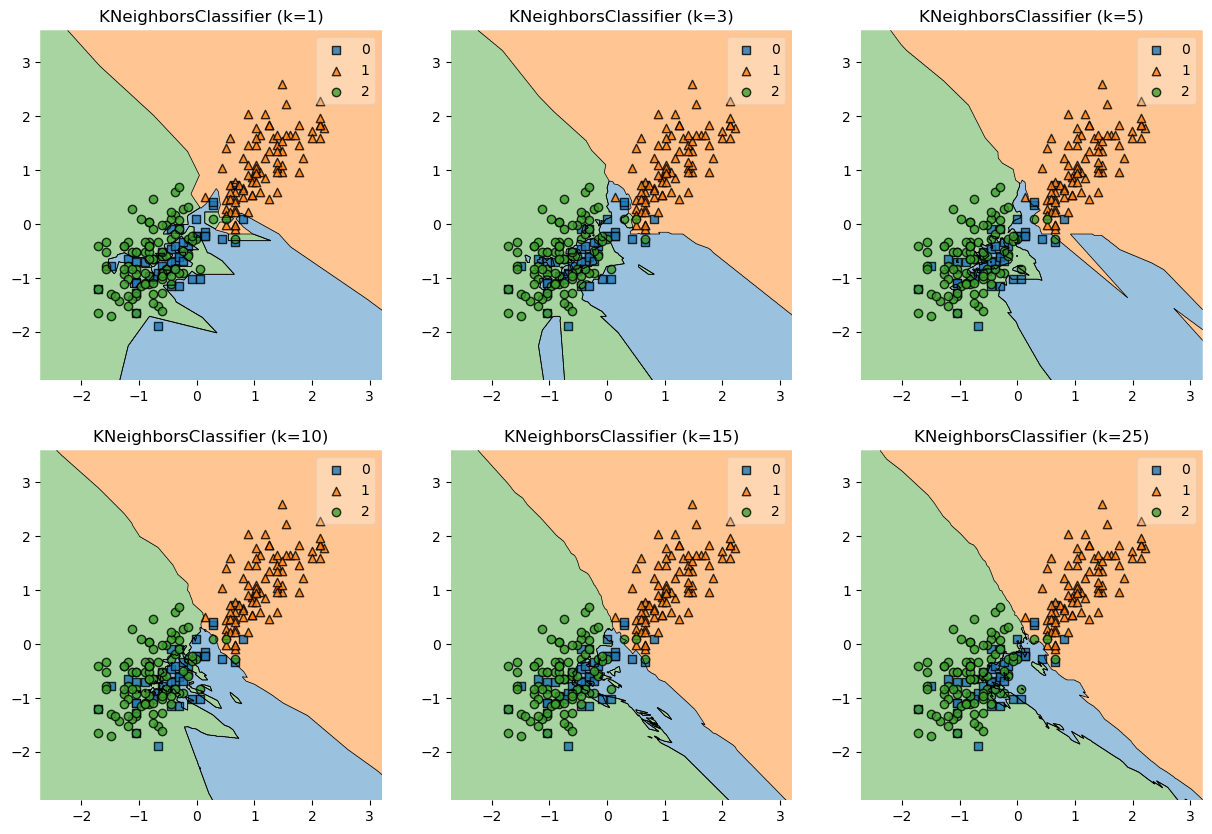

In [117]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(15, 10))

labels = ['KNeighborsClassifier (k=1)', 'KNeighborsClassifier (k=3)', 'KNeighborsClassifier (k=5)', 'KNeighborsClassifier (k=10)', 'KNeighborsClassifier (k=15)', 'KNeighborsClassifier (k=25)']
for clf, lab, grd in zip(models,
                         labels,
                         itertools.product([0, 1, 2], repeat=2)):
    clf.fit(X_train_13, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=np.array(X_train_13), y=np.array(y_train, dtype=int), clf=clf, legend=1)
    plt.title(lab)

plt.show()

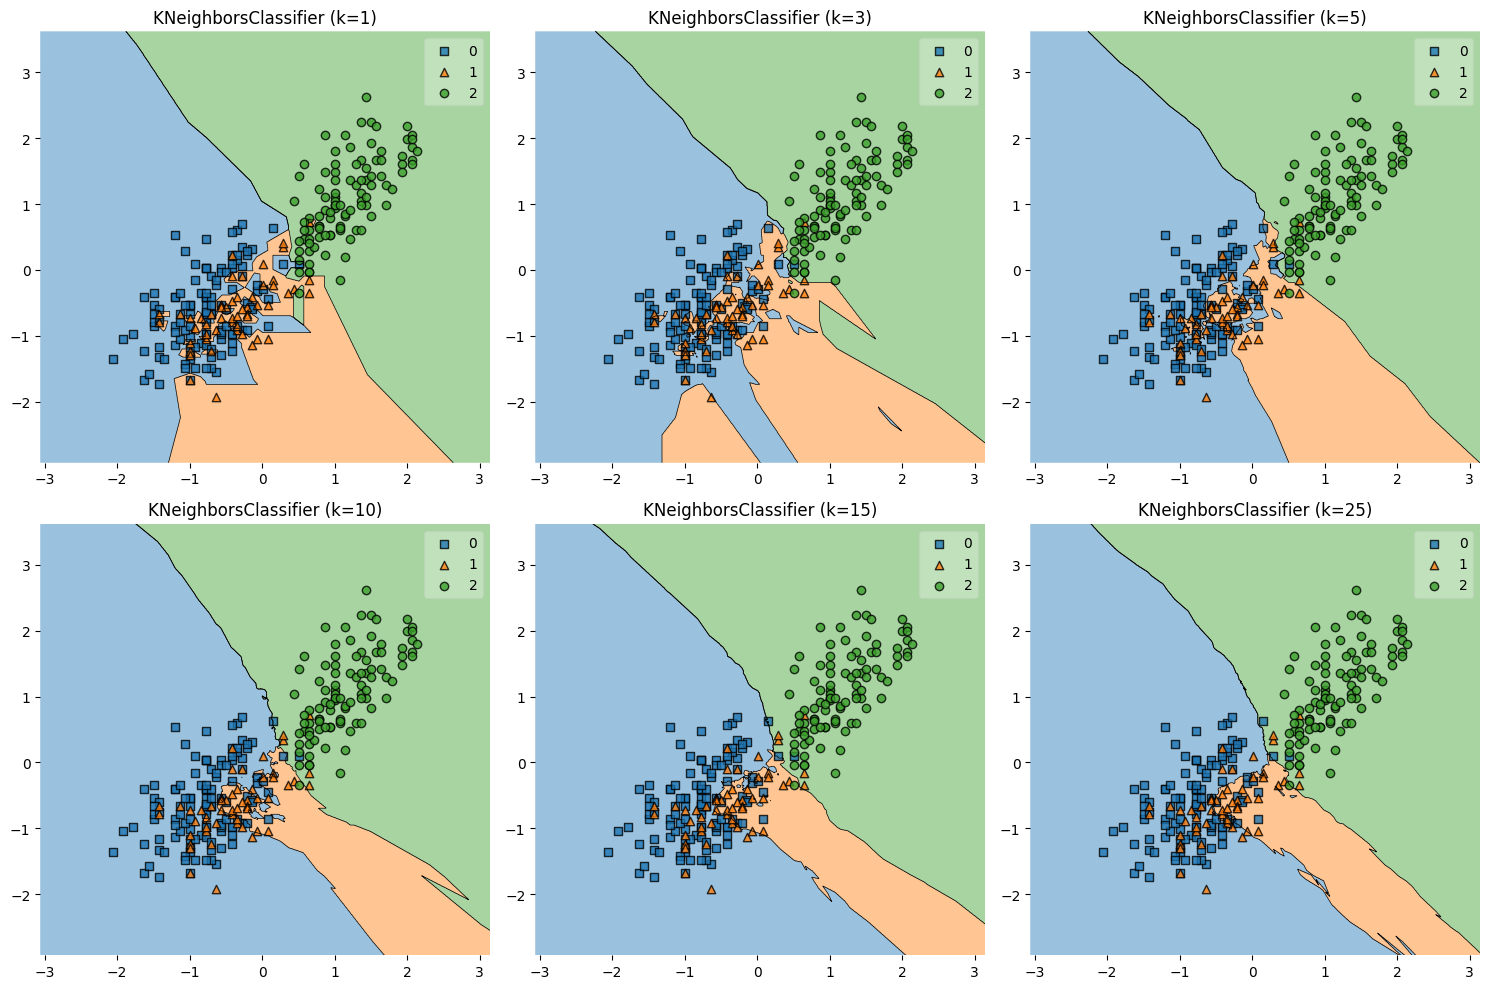

In [ ]:
# В примере пингвинчики закодированы в алфавитном порядке, ваш вариант будет отличаться.

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности. Какие из результатов явно говорят о переобучении модели? Почему?

Если посмотреть на результаты задания 1.3 самое высокое качество на обучающей выборке имеет модель с k=1, что логично, чем меньше ближайших соседей мы берем, тем болььше будет accuracy на train. Однако на тестовой выборке доля верных ответов не велика: 0.78. Таким образом, смотря на accuracy, можно взять модели с k=10 и k=15, так как у них самое высокое качество на тестовой выборке и не такое низкое на обучающей

Если посмотреть на результаты задания 1.5, сразу станет видно, что <b> модель переобучилась при k=1 и k=3</b>, так как области классов слишком подроблены и есть много маленьких кусочков. О переобучении также говорят и маленькие доли верных ответов на тестовой выборке. 

Итого, учитывая показатель accuracy и смотря на решающие поверхности, стоит <b>выбрать модель с 10 ближайшими соседями</b> 

### Задание 2. KNN своими руками. 2,5 балла

**Задача 2.1 (2 балла)** В данном задании мы попробуем реализовать алгоритм KNN своими руками, делать мы будем KNN именно для классификации.

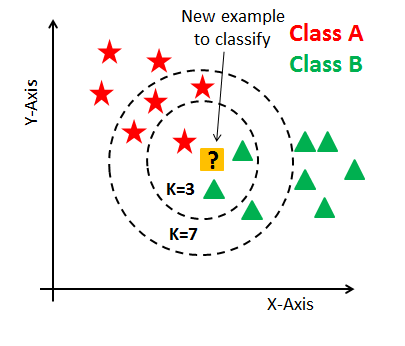

Рекомендации по реализации:
- Используйте `numpy` для представления данных в виде массивов, чтобы минимизировать преобразования.
- Избегайте циклов по всем объектам, по возможности используйте векторизированные операции.
- Обратите внимание на методы [np.linalg.norm()](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html) и [np.argsort()](https://numpy.org/doc/stable/reference/generated/numpy.argsort.html), а также на класс `collections.Counter`.
- Особый плюс, если учтёте обработку возможных ошибок.

In [491]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k:int):

        if not (isinstance(k, int) or k>0):
            raise ValueError('k must be a positive integer')
        self.k = k

    def fit(self, X, y):

        if X.shape[0] != y.shape[0]:
            raise ValueError('X and y must be the same size')
        self.X_train = np.array(X)
        self.y_train = np.array(y)

    def predict(self, X):

        X = np.array(X)
        predictions = []
        for x in X:
            dist = np.linalg.norm(self.X_train - x, axis=1)
            kind = np.argsort(dist)[:self.k]
            all_classes = self.y_train[kind]
            result = Counter(all_classes).most_common(1)
            predictions.append(result[0][0])
        return np.array(predictions)

    def count_distance(self, x, y):
        return np.linalg.norm(x - y)

In [492]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [493]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

**Задача 2.2 (0.5 балла)** Протестируйте ваш алгоритм на данных о пингвинах. Выведите лучший получившийся результат на тестовой выборке.

In [494]:
X = data.drop('Species', axis=1)
y = data['Species']

from sklearn.model_selection import train_test_split
np.random.seed(13)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13, stratify=y) 

# Масштабируем признаки при помощи модуля StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = pd.DataFrame(data=scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=X_test.columns)

k_result = 0
acc_result = 0
for i in range(1, 26):
    knn = KNN(k=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = np.mean(y_pred == y_test)
    if accuracy > acc_result:
        k_result = i
        acc_result = accuracy

print(f'Лучшее k: {k_result} c долей верных ответов (accuracy) {np.round(acc_result, 4)} на test')

Лучшее k: 5 c долей верных ответов (accuracy) 0.9898 на test


### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [294]:
bril_row = pd.read_csv('diamonds.csv')
bril_row.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.2 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их.
Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [295]:
bril_row.isna().sum().sum()

0

<b>Пропусков нет</b>

В данных есть бессмысленный столбец <b>Unnamed: 0</b>, так как он просто пронумеровывает строчки, эту функцию уже выполняет индекс. Удалим столбец

In [296]:
bril = bril_row.drop('Unnamed: 0', axis=1)

**Задача 3.2 (0.2 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Постройте матрицу корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки имеют наибольшую корреляцию с целевой переменной?

In [297]:
bril.corr(numeric_only=True)

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


С целевой переменной <b>price</b> наибольшую корреляцию имеет признак <b>carat</b> (0.921591). Также <b>price</b> имеет сильную положительную корреляцию с переменными <b>x</b> (0.884435), <b>y</b> (0.865421) и <b>z</b> (0.86124)

**Задача 3.3 (0.2 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные признаки методом OneHot-кодирования (`pd.get_dummies()` или `OneHotEncoder` из `sklearn`).

Нет смысла кодировать через OneHotEncoder, ведь все категориальные данные упорядочены. Поэтому закодируем через OrdinalEncoder: 
- cut: Fair, Good, Very Good, Premium, Ideal
- color: from J (worst) to D (best)
- clarity: I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)

In [304]:
bril['cut'].unique(), bril['color'].unique(), bril['clarity'].unique()

(array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object),
 array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object),
 array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
       dtype=object))

In [305]:
from sklearn.preprocessing import OrdinalEncoder

cut = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
enc = OrdinalEncoder(categories=[cut])
bril['cut'] = enc.fit_transform(bril[['cut']])

color = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
enc = OrdinalEncoder(categories=[color])
bril['color'] = enc.fit_transform(bril[['color']])

clarity = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
enc = OrdinalEncoder(categories=[clarity])
bril['clarity'] = enc.fit_transform(bril[['clarity']])

**Задача 3.4 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [373]:
X = bril.drop('price', axis=1)
y = bril['price']

from sklearn.model_selection import train_test_split
np.random.seed(13)
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, y, test_size=0.3, random_state=13) 

**Задача 3.5 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче стандартизируйте вещественные признаки в тренировочной и тестовой выборках с помощью `StandardScaler`.

In [374]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

numeric = ['carat', 'depth', 'table', 'x', 'y', 'z']
X_train_3_numeric = pd.DataFrame(data=scaler.fit_transform(X_train_3[numeric]), columns=X_train_3[numeric].columns, index=X_train_3.index)
X_test_3_numeric = pd.DataFrame(data=scaler.transform(X_test_3[numeric]), columns=X_test_3[numeric].columns, index=X_test_3.index)

X_train_3 = pd.concat([X_train_3.drop(numeric, axis=1), X_train_3_numeric], axis=1)
X_test_3 = pd.concat([X_test_3.drop(numeric, axis=1), X_test_3_numeric], axis=1)

Объясните, как это повлияет на интерпретацию коэффициентов линейной регрессии.

**Теперь коэффициенты для вещественных признаков будут инт ерпретироваться следующим образом: увеличение (уменьшение) $X_i$ на одно стандартное отклонение, $y$ увеличивается (уменьшается) на $w_i$.**

**Для категориальных переменных: при увеличении (уменьшении) категории $X_i$ на 1, $y$ увеличивается (уменьшается) на $w_i$**

**Задача 3.6 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [375]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [376]:
lr = LinearRegression().fit(X_train_3, y_train_3)
print('MSE')
print(f"Train: {mean_squared_error(y_train_3, lr.predict(X_train_3))}")
print(f"Test: {mean_squared_error(y_test_3, lr.predict(X_test_3))}")

MSE
Train: 1456625.8361260176
Test: 1538125.7832241415


**Задача 3.7 (0.3 балла)** Изучите [документацию](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [377]:
print(np.column_stack((lr.feature_names_in_, lr.coef_)))

[['cut' 115.91777350598169]
 ['color' 324.86660099308597]
 ['clarity' 501.84485475235374]
 ['carat' 5219.128888184804]
 ['depth' -114.06162614409793]
 ['table' -62.82025041163638]
 ['x' -1128.3088158719918]
 ['y' 52.02177357761998]
 ['z' -7.8938302181878965]]


**Переменные, чьи оценки коэффициентов, на порядок превышают оценки прочих вещественных переменных, - это $carat$ и $х$ (длина)**

**Задача 3.8 (0.5 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом.

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией.

Обучите Lasso-регрессию и Ridge-регрессию, установив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [380]:
lasso = Lasso(10).fit(X_train_3, y_train_3)
las = np.column_stack((lasso.feature_names_in_, lasso.coef_))

ridge = Ridge(10).fit(X_train_3, y_train_3)
rdg = np.column_stack((ridge.feature_names_in_, ridge.coef_))

simple = np.column_stack((lr.feature_names_in_, lr.coef_))

coef_table = pd.DataFrame({
    'Coef': [x[0] for x in simple],  
    'Lasso': [x[1] for x in las],     
    'Ridge': [x[1] for x in rdg],    
    'No Regularization': [x[1] for x in simple]})
coef_table

,Coef,Lasso,Ridge,No Regularization
0,cut,117.283965,115.968532,115.917774
1,color,316.248491,324.351772,324.866601
2,clarity,505.318073,502.189354,501.844855
3,carat,4758.616027,5182.549032,5219.128888
4,depth,-74.484738,-111.522738,-114.061626
5,table,-45.595273,-62.515428,-62.820250
6,x,-618.030714,-1084.338193,-1128.308816
7,y,-0.000000,48.048972,52.021774
8,z,-12.763831,-12.213972,-7.893830


**Можем заметить, что $Lasso$ сильно уменьшил коэффицинты перед $x$ (с -1128 до -618) и $y$ (с 52 до 0), возможно, это говорит о том, что Lasso считает эти переменные менее важными.**

**$Ridge$ тоже уменьшил веса некторых переменных, но не так радикально, например $carat$ (с 5219 до 5182) и $х$ (с -1128 до 1084).** 

**В исходной регресси коэффициенты могли быть завышены из-за мультиколлинераности. В частности $х$, $y$ и $z$ сильно коррелируют между собой (это еще было видно из матрицы корреляций), что логично, ведь все они относятся к размерам бриллиантов**

**Задача 3.9 (0.5 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

Какой метод сильнее снижает норму коэффициентов? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

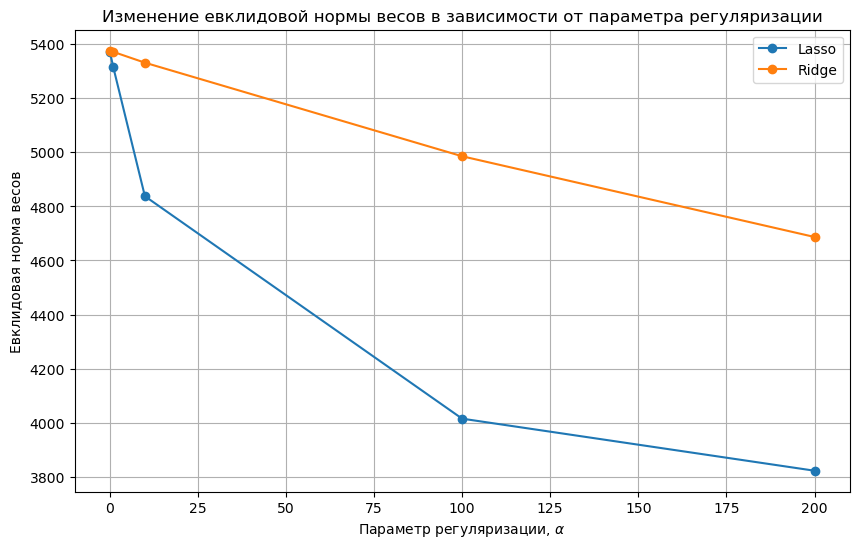

In [393]:
lassos = []
ridges = []

values = [0.1, 1, 10, 100, 200]
for alpha in values:
    lasso = Lasso(alpha)
    lasso.fit(X_train_3, y_train_3)
    lassos.append(np.linalg.norm(lasso.coef_))
    
    ridge = Ridge(alpha)
    ridge.fit(X_train_3, y_train_3)
    ridges.append(np.linalg.norm(ridge.coef_))
    
plt.figure(figsize=(10, 6))
plt.plot(values, lassos, label='Lasso', marker='o')
plt.plot(values, ridges, label='Ridge', marker='o')
plt.xlabel(f'Параметр регуляризации, $\\alpha$')
plt.ylabel('Евклидовая норма весов')
plt.title('Изменение евклидовой нормы весов в зависимости от параметра регуляризации')
plt.legend()
plt.grid(True)
plt.show()

**$Lasso$ сильнее снижает норму коэффициентов, так как $Lasso$ сильнее штрафует большие коэффициенты, что приводит к их уменьшению и обнулению.**

**$Lasso$ чаще используется для  отбора признака, так как этот штраф может совсем обнулять коэффициенты переменных, неважных для модели.**

**Задача 3.10 (0.5 балла)**
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке.

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`.

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество.

In [499]:
from sklearn.linear_model import LassoCV
np.random.seed(13)
lassocv = LassoCV(alphas=values, cv=5, random_state=13)
lassocv.fit(X_train_3, y_train_3)
mean_mse = np.round(np.mean(lassocv.mse_path_, axis=1), 3)
almse = pd.DataFrame({'Alpha': values, 'MSE': mean_mse})
min_mse = almse[almse['MSE'] == almse['MSE'].min()]['Alpha'].values[0]
print(almse)
print()
print(f'Наибольшее качество дает значение параметр регуляризации, равный {min_mse}')

   Alpha          MSE
0    0.1  1668212.276
1    1.0  1553920.822
2   10.0  1469379.194
3  100.0  1503846.164
4  200.0  1589239.311

Наибольшее качество дает значение параметр регуляризации, равный 10.0


**Задача 3.11 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [518]:
lasso_11 = Lasso(10).fit(X_train_3, y_train_3)
las = np.column_stack((lasso.feature_names_in_, lasso.coef_))
las

array([['cut', 117.2839652280558],
       ['color', 316.24849056295534],
       ['clarity', 505.31807279025327],
       ['carat', 4758.616026992676],
       ['depth', -74.4847380140784],
       ['table', -45.59527308422396],
       ['x', -618.0307135652565],
       ['y', -0.0],
       ['z', -12.763831263892737]], dtype=object)

1) **Неинформативными** признаками оказались $y$ и $z$, так как их коэффициенты близки к нулю: -0.0 и -12.76 соответственно. Могу предположить, что они оказались неинформативными, так как сильно коррелируют с $x$, поэтому Lasso уменьшил их значимость в моделе
2) **Наиболее информативными** оказались такие признаки, как:
 - $carat$ (4758.62). Это самый значимый признак, что является логичным, ведь вес бриллианта один из важнейших факторов, вляющих на цену
 - $x$ (-618.03). Показывает длину бриллианта
 - $clarity$ (505.32). Четкость бриллианта также является одним из ключевых признаков при оценке бриллианта

**Задача 3.12 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [516]:
print(f"MSE Lasso (10): {mean_squared_error(y_test_3, lasso_11.predict(X_test_3))}")
print(f"MSE No regularization: {mean_squared_error(y_test_3, lr.predict(X_test_3))}")

MSE Lasso (10): 1529810.7241558235
MSE No regularization: 1538125.7832241415


$Lasso$ показала немного меньшую среднеквадратичную ошибку на тестовой выборке, чем модель без регуляризации. Соотвственно, $Lasso$ лучше справляется с предсказанием данных

Это может быть из-за того, что модель $Lasso$ добавляет штраф за большие веса и тем самым предотвращает переобучение модели. Более того, она исправляет проблему мультиколлинеарности (которая была замечена среди наших признаков)

### Хорошая домашка, ставлю лайк